# New Section

In [0]:

def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
# Unpickling uploaded data
train1 = unpickle('drive/My Drive/data_batch_1')
train2 = unpickle('drive/My Drive/data_batch_2')
train3 = unpickle('drive/My Drive/data_batch_3')
train4 = unpickle('drive/My Drive/data_batch_4')
train5 = unpickle('drive/My Drive/data_batch_5')
test=unpickle('drive/My Drive/test_batch')

In [0]:
# Importing everything required to build our model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term


In [0]:
train_x = np.concatenate((train1[b'data'], train2[b'data'], train3[b'data'], train4[b'data'], train5[b'data']),axis=0)
train_y = np.concatenate((train1[b'labels'], train2[b'labels'], train3[b'labels'], train4[b'labels'], train5[b'labels']),axis=0)
 
# Converts image to (width x height x num_channel) format
b = np.reshape(train_x,(50000,3,32,32))
train_x = np.transpose(b,(0,2,3,1))
test_x=np.array(test[b'data'])
b= np.reshape(test_x,(10000,3,32,32))
test_x=np.transpose(b,(0,2,3,1))
test_x=test_x.astype('float32')/255
test_y=np.array(test[b'labels'])
test_y=np.expand_dims(test_y,axis=-1)
 
# Normalizes the data between 0 and 1
train_x = train_x.astype('float32')/255
train_y = np.expand_dims(train_y,axis=-1)

In [0]:
# Training and Testing Data
x_train = train_x[:50000]
y_train = train_y[:50000]
val_x = test_x[:10000]
val_y = test_y[:10000]

In [0]:
# Adding layers and specifying operations for our model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(300, activation='relu'))
model.add(Dense(20, activation='softmax'))
 
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




In [0]:
# Data Augmentation to give our model the ability to generalize slightly better
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(width_shift_range=0.1,
                                    height_shift_range=0.1,
                                    horizontal_flip=True,)
                                  

In [0]:
train_generator = train_datagen.flow(x_train, y_train, batch_size=100,shuffle=True)
history = model.fit_generator(train_generator, steps_per_epoch=500, validation_data=(val_x, val_y),epochs=15)
# Running our model on the data


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/15
500/500 [==============================] - 439s 878ms/step - loss: 1.5597 - acc: 0.4488 - val_loss: 1.3271 - val_acc: 0.5207
Epoch 2/15
500/500 [==============================] - 438s 877ms/step - loss: 1.1429 - acc: 0.5887 - val_loss: 1.1126 - val_acc: 0.6132
Epoch 3/15
500/500 [==============================] - 436s 872ms/step - loss: 0.9534 - acc: 0.6613 - val_loss: 0.8400 - val_acc: 0.7071
Epoch 4/15
500/500 [==============================] - 435s 870ms/step - loss: 0.8487 - acc: 0.6972 - val_loss: 0.8923 - val_acc: 0.7003
Epoch 5/15
500/500 [==============================] - 438s 876ms/step - loss: 0.7821 - acc: 0.7244 - val_loss: 0.8386 - val_acc: 0.7148
Epoch 6/15
500/500 [==============================] - 436s 872ms/step - loss: 0.7336 - acc: 0.7444 - val_loss: 0.8000 - val_acc: 0.7300
Epoch 7/15
500/500 [==============================] - 434s 868ms/step - loss: 0.6943 - a

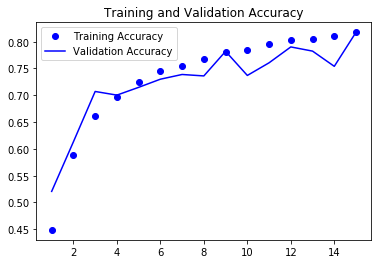

In [0]:
train_acc = history.history['acc']
validation_acc = history.history['val_acc']
epochs = range(1,16)
plt.plot(epochs,train_acc,'bo',label='Training Accuracy')
plt.plot(epochs,validation_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
# Plot of Training and Testing Accuracy